In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#import warnings
#warnings.filterwarnings('ignore')

#### Project Outline - Shared Doc
https://docs.google.com/document/d/1gZ5QkT95D7WJ8sPUyC0qURUVcKZQrPub2nR4gyRYPkc/edit?usp=sharing

### Exploratory Data Analysis

In [2]:
hate_crime = pd.read_csv('hate_crime.csv')

#shape and first 5 rows
print(hate_crime.shape)
hate_crime.head(5)

(219577, 28)


C:\Users\aspen\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,INCIDENT_ID,DATA_YEAR,ORI,PUB_AGENCY_NAME,PUB_AGENCY_UNIT,AGENCY_TYPE_NAME,STATE_ABBR,STATE_NAME,DIVISION_NAME,REGION_NAME,...,OFFENDER_RACE,OFFENDER_ETHNICITY,VICTIM_COUNT,OFFENSE_NAME,TOTAL_INDIVIDUAL_VICTIMS,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES,MULTIPLE_OFFENSE,MULTIPLE_BIAS
0,3015,1991,AR0040200,Rogers,NaN,City,AR,Arkansas,West South Central,South,...,White,NaN,1,Intimidation,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-Black or African American,Individual,S,S
1,3016,1991,AR0290100,Hope,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,1,Simple Assault,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,S,S
2,43,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,1,Aggravated Assault,1.0,Residence/Home,Anti-Black or African American,Individual,S,S
3,44,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,2,Aggravated Assault;Destruction/Damage/Vandalis...,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,M,S
4,3017,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,1,Aggravated Assault,1.0,Service/Gas Station,Anti-White,Individual,S,S


In [3]:
population_groups = hate_crime[['POPULATION_GROUP_CODE', 'POPULATION_GROUP_DESC']].value_counts()
population_groups_df = pd.DataFrame(population_groups).sort_values('POPULATION_GROUP_CODE').reset_index()
population_groups_df = population_groups_df[['POPULATION_GROUP_CODE', 'POPULATION_GROUP_DESC']]
population_groups_df

,POPULATION_GROUP_CODE,POPULATION_GROUP_DESC
0,0,"Possessions (Puerto Rico, Guam, Canal Zone, Vi..."
1,1A,"Cities 1,000,000 or over"
2,1B,"Cities from 500,000 thru 999,999"
3,1C,"Cities from 250,000 thru 499,999"
4,2,"Cities from 100,000 thru 249,999"
5,3,"Cities from 50,000 thru 99,999"
6,4,"Cities from 25,000 thru 49,999"
7,5,"Cities from 10,000 thru 24,999"
8,6,"Cities from 2,500 thru 9,999"
9,7,"Cities under 2,500"


In [4]:
#year range
hate_crime['DATA_YEAR'].agg([np.max, np.min])

amax    2020
amin    1991
Name: DATA_YEAR, dtype: int64

In [5]:
#datatypes and null count
hate_crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219577 entries, 0 to 219576
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   INCIDENT_ID               219577 non-null  int64  
 1   DATA_YEAR                 219577 non-null  int64  
 2   ORI                       219577 non-null  object 
 3   PUB_AGENCY_NAME           219577 non-null  object 
 4   PUB_AGENCY_UNIT           6431 non-null    object 
 5   AGENCY_TYPE_NAME          219577 non-null  object 
 6   STATE_ABBR                219577 non-null  object 
 7   STATE_NAME                219577 non-null  object 
 8   DIVISION_NAME             219577 non-null  object 
 9   REGION_NAME               219577 non-null  object 
 10  POPULATION_GROUP_CODE     219577 non-null  object 
 11  POPULATION_GROUP_DESC     219577 non-null  object 
 12  INCIDENT_DATE             219577 non-null  object 
 13  ADULT_VICTIM_COUNT        51411 non-null   f

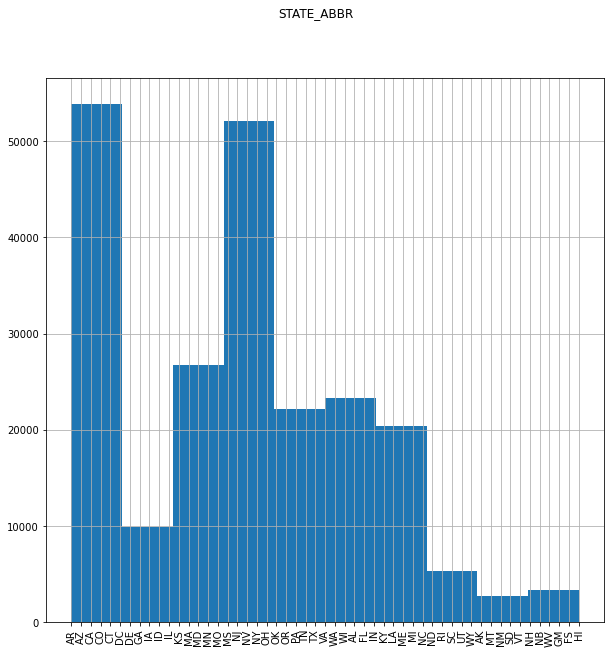

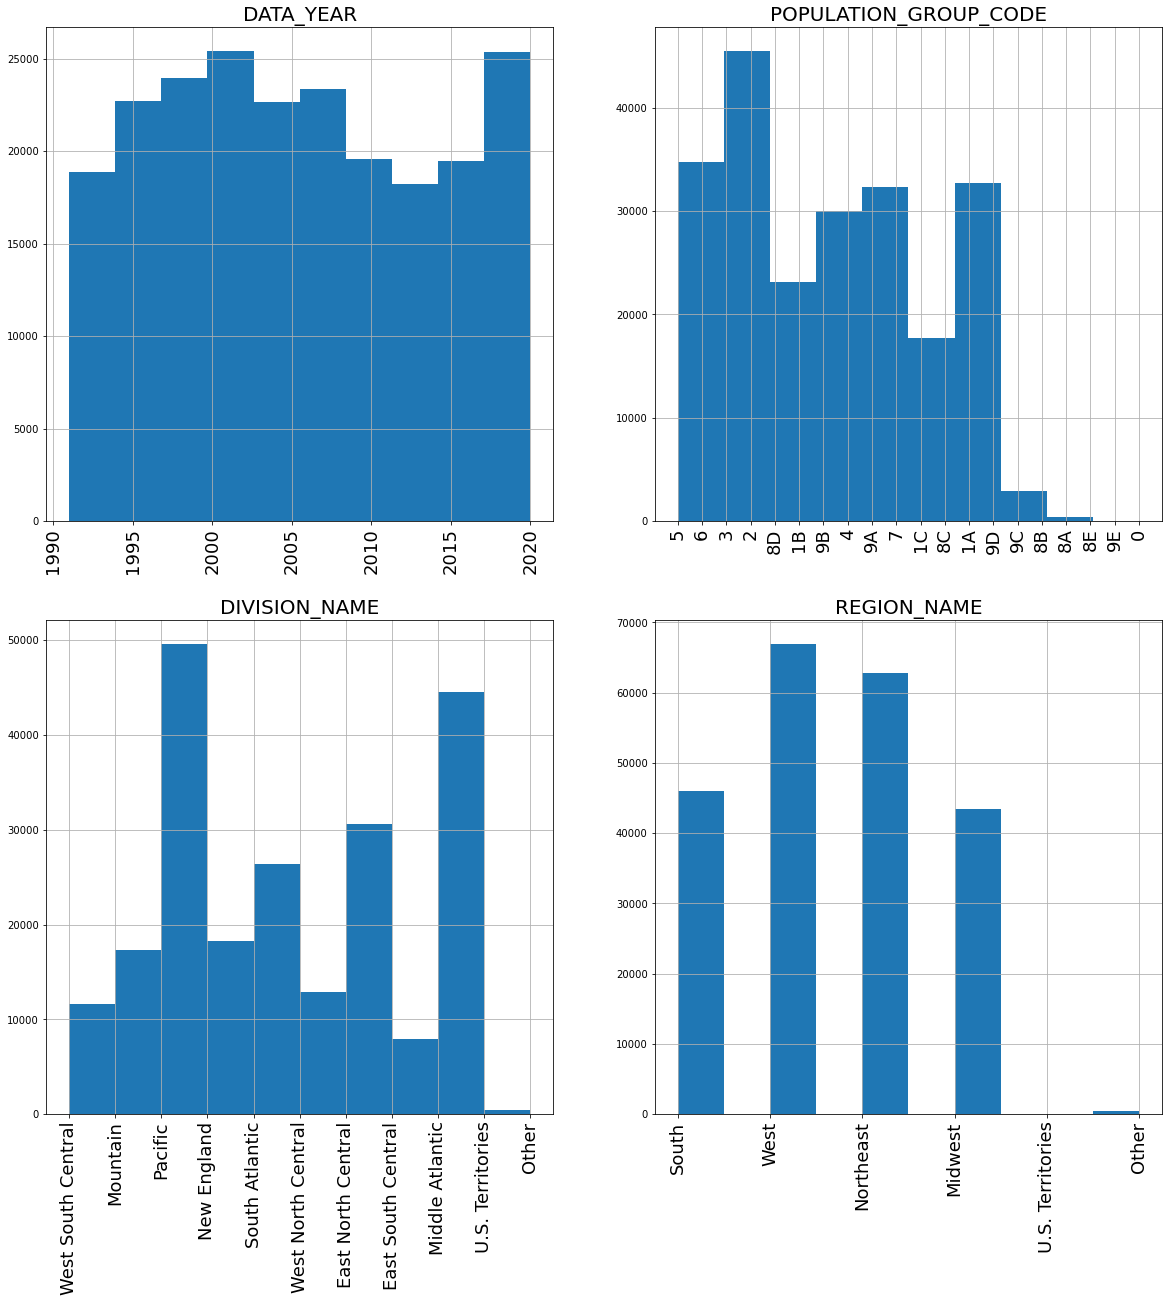

In [6]:
## Location / Population Data Exploration
fig = plt.plot()
hate_crime['STATE_ABBR'].hist(figsize=(10,10))
plt.xticks(rotation='vertical')
plt.suptitle('STATE_ABBR')
plt.show()


fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20,20))
 
hate_crime['DATA_YEAR'].hist(ax=axes[0,0])
plt.sca(axes[0,0])
plt.xticks(rotation='vertical', fontsize=18)
plt.title('DATA_YEAR', fontsize=20)

hate_crime['POPULATION_GROUP_CODE'].hist(ax=axes[0,1])
plt.sca(axes[0,1])
plt.xticks(rotation='vertical', fontsize=18)
plt.title('POPULATION_GROUP_CODE', fontsize=20)

hate_crime['DIVISION_NAME'].hist(ax=axes[1,0])
plt.sca(axes[1,0])
plt.xticks(rotation='vertical', fontsize=18)
plt.title('DIVISION_NAME', fontsize=20)

hate_crime['REGION_NAME'].hist(ax=axes[1,1])
plt.sca(axes[1,1])
plt.xticks(rotation='vertical', fontsize=18)
plt.title('REGION_NAME', fontsize=20)

plt.show()


#Observations - States, Regions, Divisions are likley skewed by population, look at correlation with population descriptions
#US Territories and Other can be dropped from REgion/Division due to small sample size


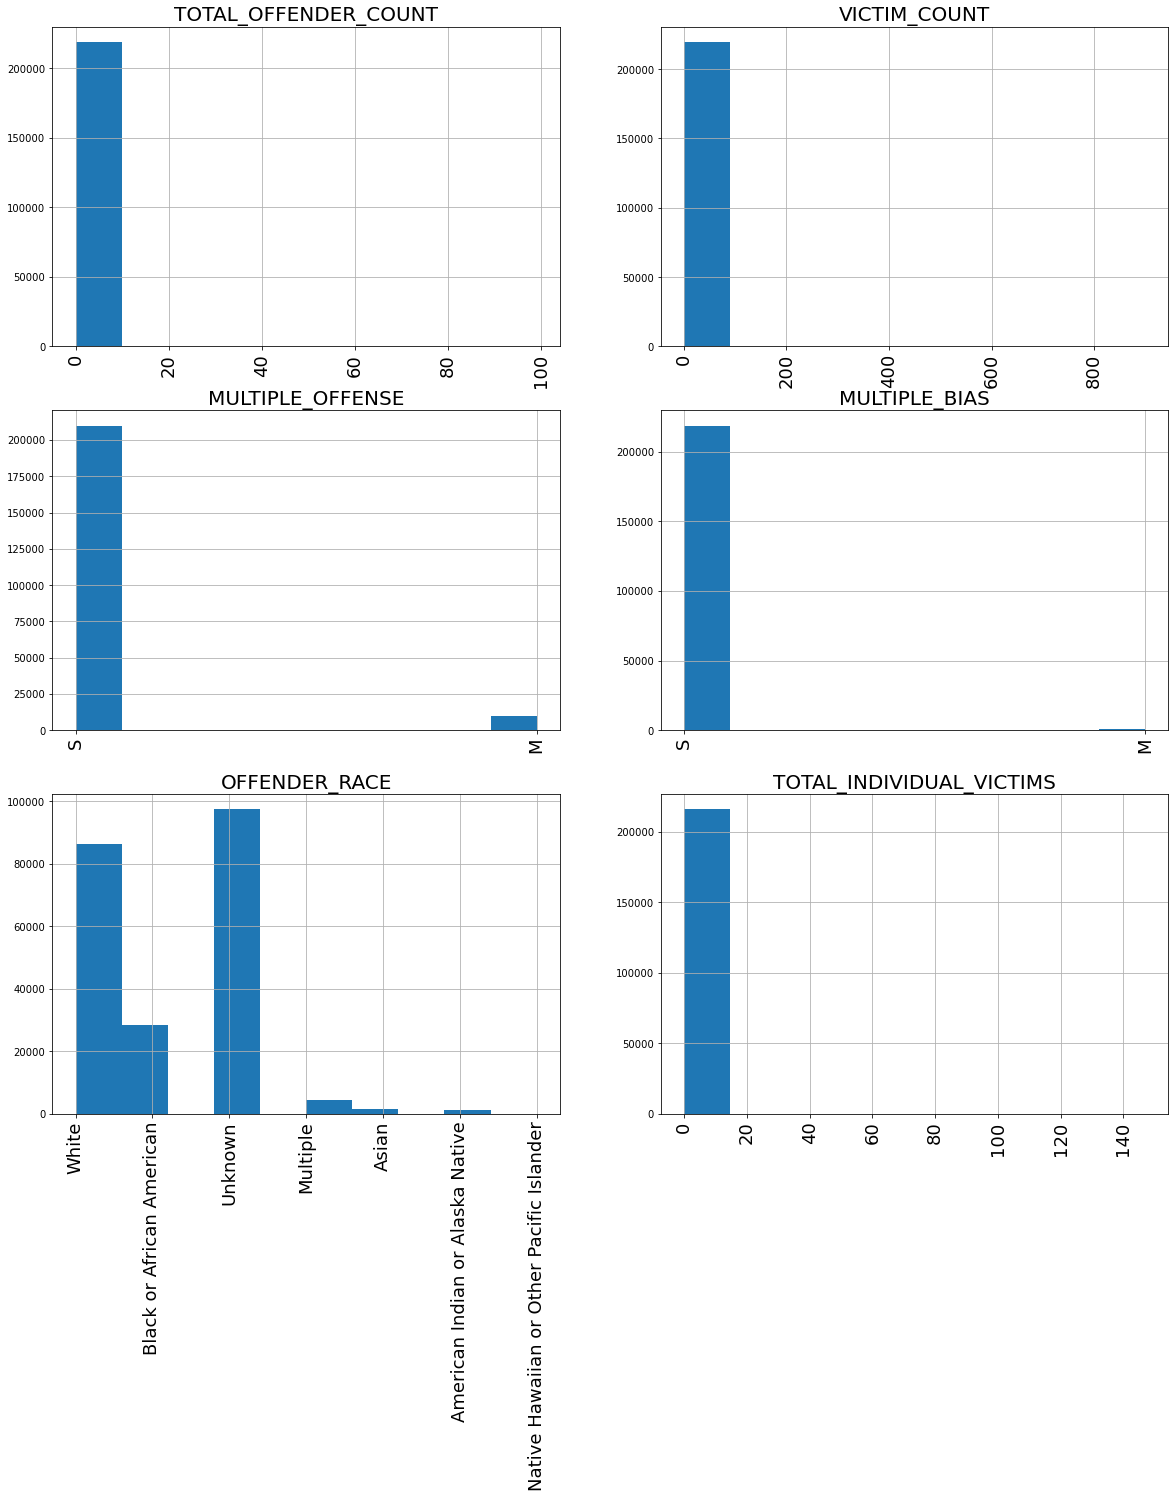

In [7]:
# OFFENDER / VICTIM DATA EXPLORATION

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20,20))

hate_crime['TOTAL_OFFENDER_COUNT'].hist(ax=axes[0,0])
plt.sca(axes[0,0])
plt.xticks(rotation='vertical', fontsize=18)
plt.title('TOTAL_OFFENDER_COUNT', fontsize=20)

hate_crime['VICTIM_COUNT'].hist(ax=axes[0,1])
plt.sca(axes[0,1])
plt.xticks(rotation='vertical', fontsize=18)
plt.title('VICTIM_COUNT', fontsize=20)


hate_crime['MULTIPLE_OFFENSE'].hist(ax=axes[1,0])
plt.sca(axes[1,0])
plt.xticks(rotation='vertical', fontsize=18)
plt.title('MULTIPLE_OFFENSE', fontsize=20)

hate_crime['MULTIPLE_BIAS'].hist(ax=axes[1,1])
plt.sca(axes[1,1])
plt.xticks(rotation='vertical', fontsize=18)
plt.title('MULTIPLE_BIAS', fontsize=20)


hate_crime['OFFENDER_RACE'].hist(ax=axes[2,0])
plt.sca(axes[2,0])
plt.xticks(rotation='vertical', fontsize=18)
plt.title('OFFENDER_RACE', fontsize=20)

hate_crime['TOTAL_INDIVIDUAL_VICTIMS'].hist(ax=axes[2,1])
plt.sca(axes[2,1])
plt.xticks(rotation='vertical', fontsize=18)
plt.title('TOTAL_INDIVIDUAL_VICTIMS', fontsize=20)


plt.show()

##Observations - Offender and Vistim count that are much larger that average should be considered outliers and removed
#Multiple Offense/Multiple Bias have too few observations in the multiple category & should be removed
# Total_Individual_Victims and Victim_count have conflicting meaning, seems liek Victim Coiunt is more accurate, more explorationg needed

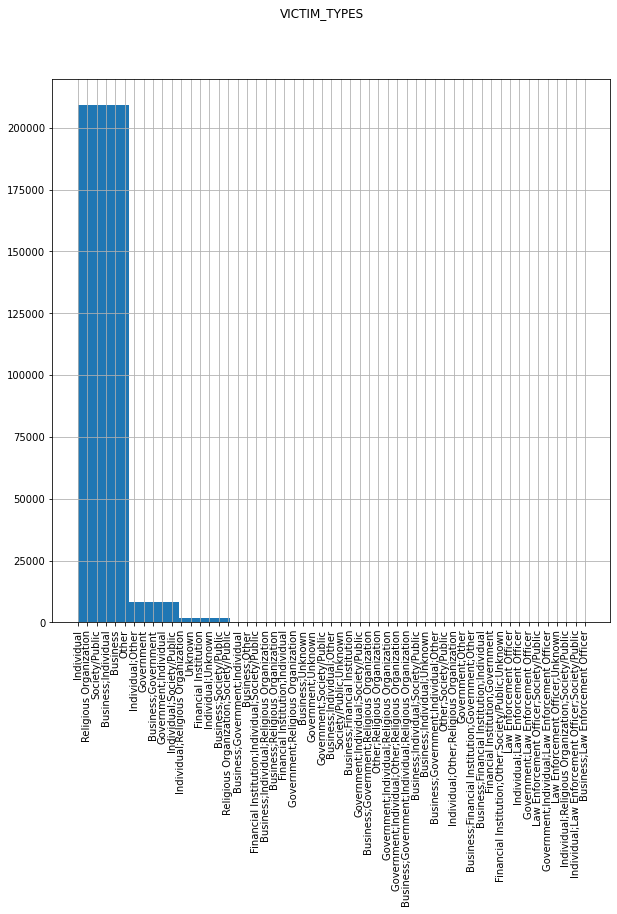

In [8]:
fig = plt.plot()
hate_crime['VICTIM_TYPES'].hist(figsize=(10,10))
plt.xticks(rotation='vertical', fontsize=10)
plt.suptitle('VICTIM_TYPES')
plt.show()

## Observations - The vast majority of categories for VICTIM_TYPE, LOCATION NAME and BIAS DESCRIPTION
 # are redundant, many categories can be combined into the top 10-15 for each column

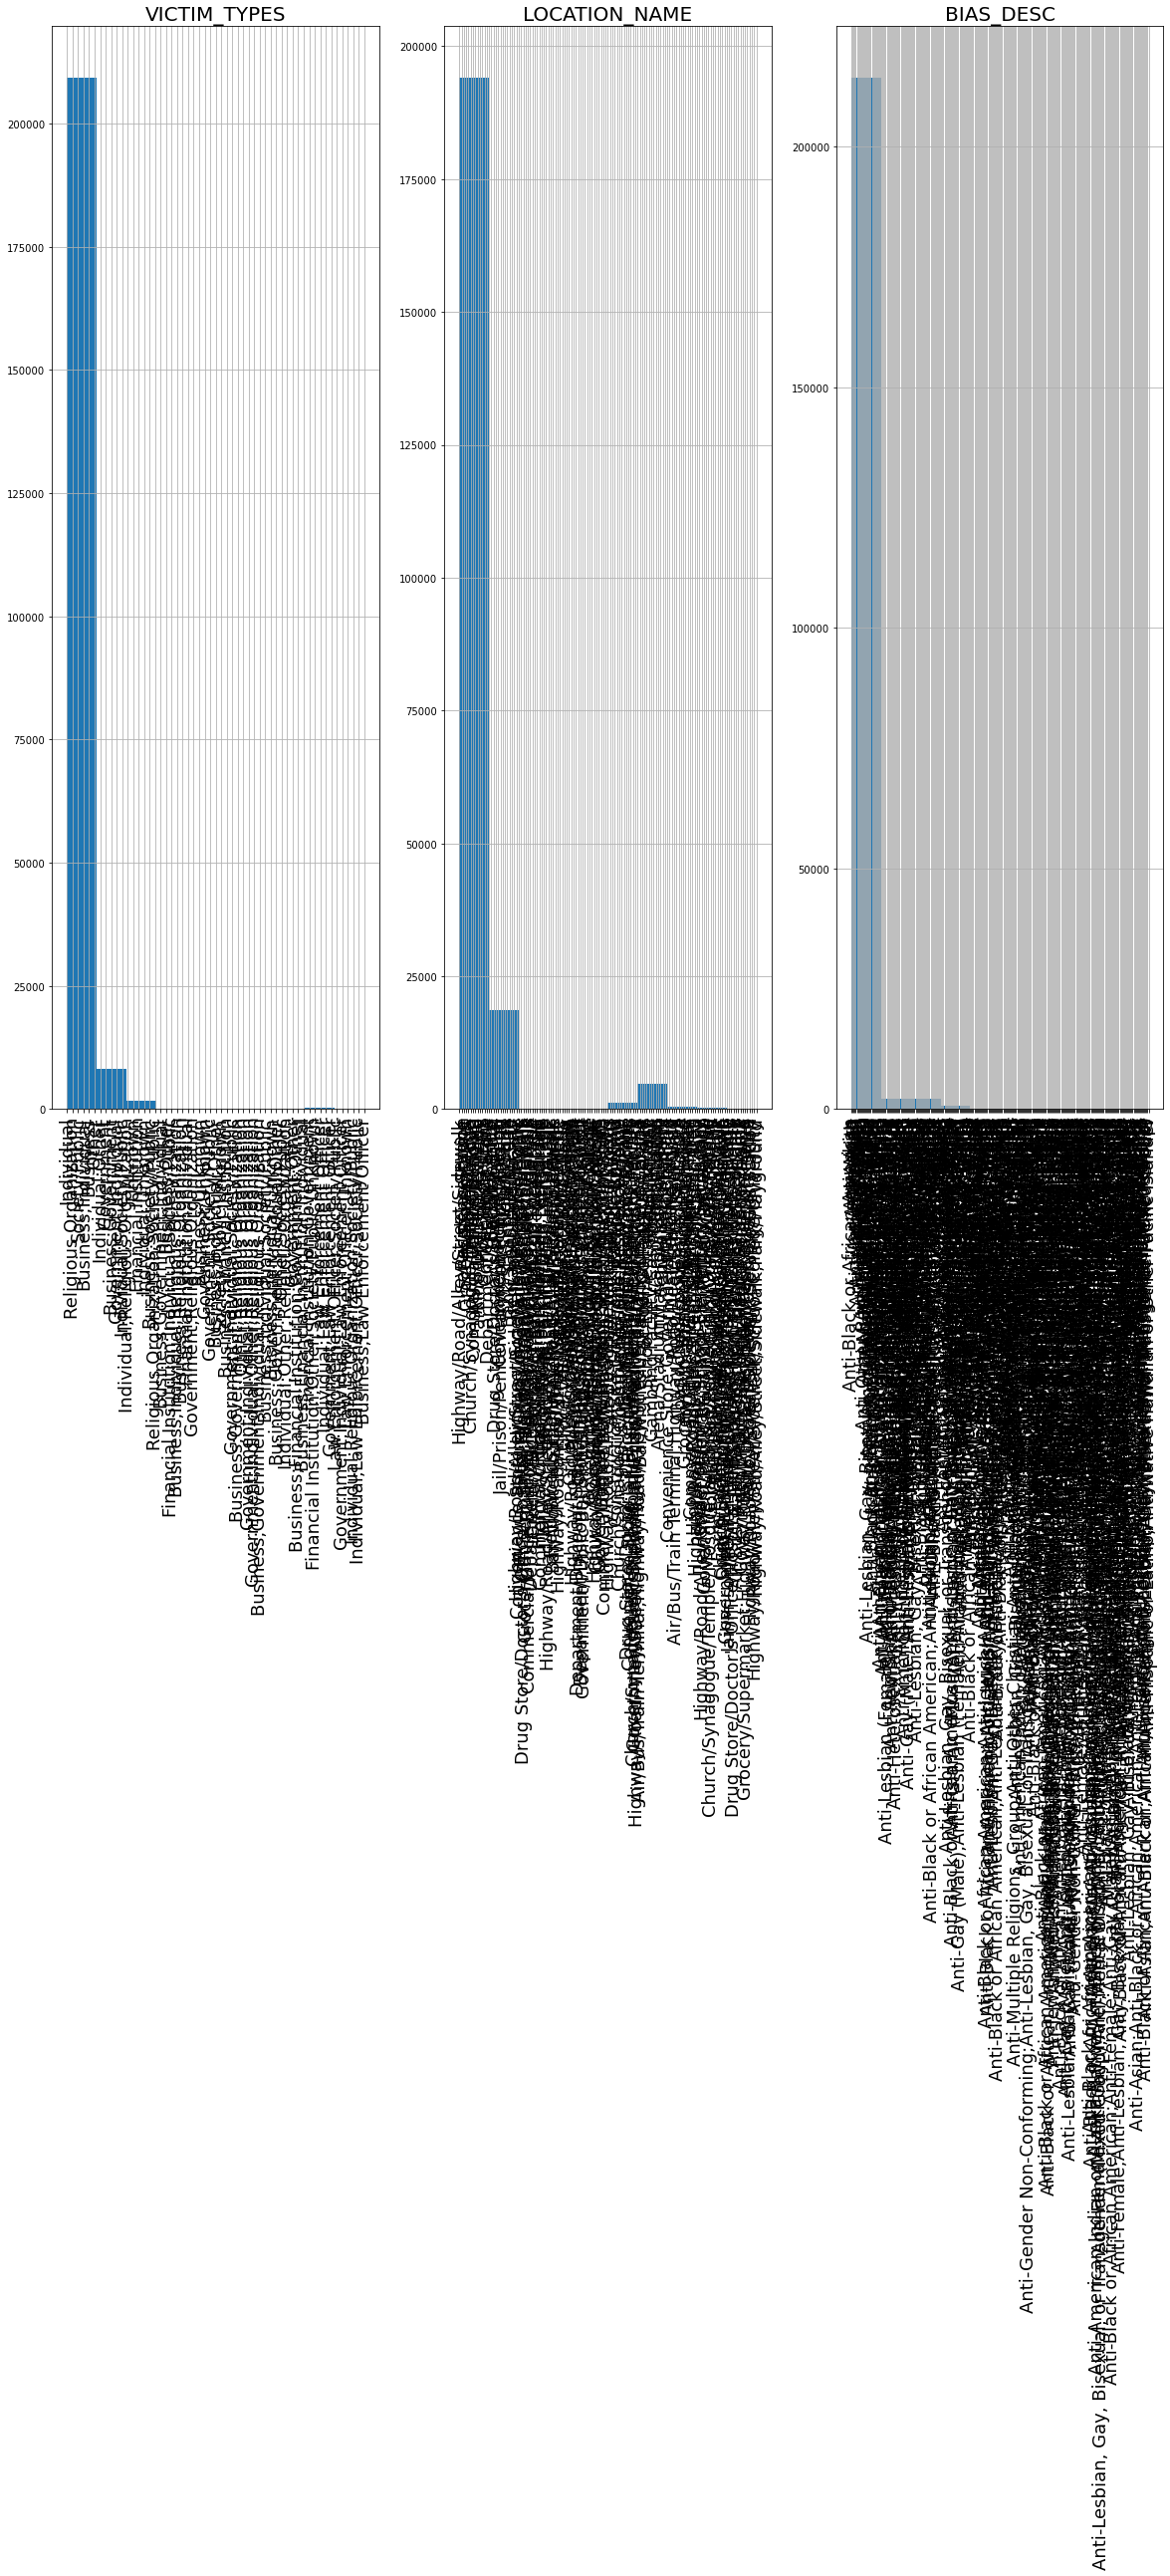

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,20))

hate_crime['VICTIM_TYPES'].hist(ax=axes[0])
plt.sca(axes[0])
plt.xticks(rotation='vertical', fontsize=18)
plt.title('VICTIM_TYPES', fontsize=20)

hate_crime['LOCATION_NAME'].hist(ax=axes[1])
plt.sca(axes[1])
plt.xticks(rotation='vertical', fontsize=18)
plt.title('LOCATION_NAME', fontsize=20)

hate_crime['BIAS_DESC'].hist(ax=axes[2])
plt.sca(axes[2])
plt.xticks(rotation='vertical', fontsize=18)
plt.title('BIAS_DESC', fontsize=20)

plt.show()

## Observations - The vast majority of categories for VICTIM_TYPE, LOCATION NAME and BIAS DESCRIPTION
 # are redundant, many categories can be combined into the top 10-15 for each column

In [10]:
# political climate csv
political = pd.read_csv('political_climate.csv')
political

,Congress,Year Start,Year End,House Majority,Senate Majority,Presidency,President,Party Government
0,102,1991,1993,Democrats,Democrats,Republican,G.H.W Bush,Divided
1,103,1993,1995,Democrats,Democrats,Democrat,Clinton,Unified
2,104,1995,1997,Republicans,Republicans,Democrat,Clinton,Divided
3,105,1997,1999,Republicans,Republicans,Democrat,Clinton,Divided
4,106,1999,2001,Republicans,Republicans,Democrat,Clinton,Divided
5,107,2001,2003,Republicans,Republicans / Democrats12,Republican,G.W. Bush,Unified / Divided
6,108,2003,2005,Republicans,Republicans,Republican,G.W. Bush,Unified
7,109,2005,2007,Republicans,Republicans,Republican,G.W. Bush,Unified
8,110,2007,2009,Democrats,Democrats13,Republican,G.W. Bush,Divided
9,111,2009,2011,Democrats,Democrats,Democrat,Obama,Unified


### Preprocessing

In [11]:
#dropping duplicate columns like state name and unnecessary columns like Agency Name
hate_crime = hate_crime.drop(['STATE_NAME', 'POPULATION_GROUP_DESC', 'PUB_AGENCY_UNIT', 
                              'ORI', 'PUB_AGENCY_NAME', 'AGENCY_TYPE_NAME', 
                              'TOTAL_INDIVIDUAL_VICTIMS','DIVISION_NAME', 'INCIDENT_ID', 
                              'MULTIPLE_OFFENSE', 'MULTIPLE_BIAS'], axis=1)
hate_crime.head()

,DATA_YEAR,STATE_ABBR,REGION_NAME,POPULATION_GROUP_CODE,INCIDENT_DATE,ADULT_VICTIM_COUNT,JUVENILE_VICTIM_COUNT,TOTAL_OFFENDER_COUNT,ADULT_OFFENDER_COUNT,JUVENILE_OFFENDER_COUNT,OFFENDER_RACE,OFFENDER_ETHNICITY,VICTIM_COUNT,OFFENSE_NAME,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES
0,1991,AR,South,5,31-AUG-91,NaN,NaN,1,NaN,NaN,White,NaN,1,Intimidation,Highway/Road/Alley/Street/Sidewalk,Anti-Black or African American,Individual
1,1991,AR,South,6,19-SEP-91,NaN,NaN,1,NaN,NaN,Black or African American,NaN,1,Simple Assault,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual
2,1991,AR,South,3,04-JUL-91,NaN,NaN,1,NaN,NaN,Black or African American,NaN,1,Aggravated Assault,Residence/Home,Anti-Black or African American,Individual
3,1991,AR,South,3,24-DEC-91,NaN,NaN,1,NaN,NaN,Black or African American,NaN,2,Aggravated Assault;Destruction/Damage/Vandalis...,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual
4,1991,AR,South,3,23-DEC-91,NaN,NaN,1,NaN,NaN,Black or African American,NaN,1,Aggravated Assault,Service/Gas Station,Anti-White,Individual


In [12]:
#checking null values

percent_missing = hate_crime.isnull().sum() *100/len(hate_crime)
missing_values_df = pd.DataFrame({'column_name': hate_crime.columns, 'percent_missing': percent_missing})
missing_values_df.sort_values('percent_missing', inplace = True)
display(missing_values_df)

#drop columns with more than 70% missing values
perc = 70.0
min_count = int(((100-perc)/100)*hate_crime.shape[0]+1)
hate_crime = hate_crime.dropna(axis=1, thresh=min_count)

#checking remaining missing values
hate_crime.isnull().sum()

,column_name,percent_missing
DATA_YEAR,DATA_YEAR,0.000000
LOCATION_NAME,LOCATION_NAME,0.000000
OFFENSE_NAME,OFFENSE_NAME,0.000000
VICTIM_COUNT,VICTIM_COUNT,0.000000
BIAS_DESC,BIAS_DESC,0.000000
TOTAL_OFFENDER_COUNT,TOTAL_OFFENDER_COUNT,0.000000
VICTIM_TYPES,VICTIM_TYPES,0.000000
INCIDENT_DATE,INCIDENT_DATE,0.000000
POPULATION_GROUP_CODE,POPULATION_GROUP_CODE,0.000000
REGION_NAME,REGION_NAME,0.000000


DATA_YEAR                 0
STATE_ABBR                0
REGION_NAME               0
POPULATION_GROUP_CODE     0
INCIDENT_DATE             0
TOTAL_OFFENDER_COUNT      0
OFFENDER_RACE            20
VICTIM_COUNT              0
OFFENSE_NAME              0
LOCATION_NAME             0
BIAS_DESC                 0
VICTIM_TYPES              0
dtype: int64

In [13]:
# replace null values in OFFENDER RACE column

#view unique values
unique_race_cat = hate_crime['OFFENDER_RACE'].unique()
print(unique_race_cat)

#replace nan with unknown label
hate_crime['OFFENDER_RACE'] = hate_crime['OFFENDER_RACE'].replace(np.nan, 'Unknown')
hate_crime['OFFENDER_RACE'].unique()

['White' 'Black or African American' 'Unknown' 'Multiple' 'Asian'
 'American Indian or Alaska Native'
 'Native Hawaiian or Other Pacific Islander' nan]


array(['White', 'Black or African American', 'Unknown', 'Multiple',
       'Asian', 'American Indian or Alaska Native',
       'Native Hawaiian or Other Pacific Islander'], dtype=object)

In [14]:
#verifying no missing values
hate_crime.isnull().sum()

DATA_YEAR                0
STATE_ABBR               0
REGION_NAME              0
POPULATION_GROUP_CODE    0
INCIDENT_DATE            0
TOTAL_OFFENDER_COUNT     0
OFFENDER_RACE            0
VICTIM_COUNT             0
OFFENSE_NAME             0
LOCATION_NAME            0
BIAS_DESC                0
VICTIM_TYPES             0
dtype: int64

In [15]:
hate_crime.head(3)

,DATA_YEAR,STATE_ABBR,REGION_NAME,POPULATION_GROUP_CODE,INCIDENT_DATE,TOTAL_OFFENDER_COUNT,OFFENDER_RACE,VICTIM_COUNT,OFFENSE_NAME,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES
0,1991,AR,South,5,31-AUG-91,1,White,1,Intimidation,Highway/Road/Alley/Street/Sidewalk,Anti-Black or African American,Individual
1,1991,AR,South,6,19-SEP-91,1,Black or African American,1,Simple Assault,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual
2,1991,AR,South,3,04-JUL-91,1,Black or African American,1,Aggravated Assault,Residence/Home,Anti-Black or African American,Individual


### Transforming Datatypes

In [16]:
#convert to datetime
hate_crime["INCIDENT_DATE"] = pd.to_datetime(hate_crime["INCIDENT_DATE"])
hate_crime.dtypes

DATA_YEAR                         int64
STATE_ABBR                       object
REGION_NAME                      object
POPULATION_GROUP_CODE            object
INCIDENT_DATE            datetime64[ns]
TOTAL_OFFENDER_COUNT              int64
OFFENDER_RACE                    object
VICTIM_COUNT                      int64
OFFENSE_NAME                     object
LOCATION_NAME                    object
BIAS_DESC                        object
VICTIM_TYPES                     object
dtype: object

### Categorical Encoding

In [17]:
#STATE_ABBR, REGION_NAME, POPULATION_GROUP_CODE, OFFENDER_RACE, 
#OFFENSE_NAME, LOCATION_NAME, BIAS_DESC, VICTIM_TYPES

In [18]:
# https://stackoverflow.com/questions/36072626/pandas-replace-multiple-values-at-once
#reduce the number of categories for VICTIM_TYPES by condensing labels
replacements = {'VICTIM_TYPES':{r'.*Law Enforcement Officer.*':'Law Enforcement Officer', 
                                r'.*Religious Organization.*': 'Religious Organization', 
                                r'.*Business.*': 'Business', 
                                r'.*Government.*': 'Government', 
                                r'.*Individual.*': 'Individual', 
                                r'.*Society/Public.*':'Society/Public'}, 
               'BIAS_DESC':{r'.*Anti-Black.*':'Anti-Black or African American', 
                             r'.*Anti-Jewish.*': 'Anti-Jewish', 
                             r'.*Anti-Gay.*': 'Anti-Gay (Male)',
                             r'.*Anti-Lesbian.*': 'Anti-Lesbian (Female)', 
                             r'.*Anti-Islamic.*': 'Anti-Islamic (Muslim)',
                             r'.*Anti-Hispanic.*': 'Anti-Hispanic or Latino',
                             r'.*Anti-Transgender.*': 'Anti-Transgender', 
                             r'.*Anti-Gender Non-Conforming.*': 'Anti-Gender Non-Conforming',
                             r'.*Anti-Asian.*': 'Anti-Asian',
                             r'.*Anti-Bisexual,*':'Anti-Bisexual',
                             r'.*Anti-American Indian.*': 'Anti-Native American',
                             r'.*Anti-Mental Disability.*': 'Anti-Mental Disability',
                             r'.*Anti-Physical Disability.*': 'Anti-Physical Disability',
                             r'.*Anti-Other Religion.*': 'Anti-Other Religion', 
                             r'.*Anti-Multiple Races, Group.*': 'Anti-Multiple Races, Group', 
                             r'.*Anti-Hindu.*': 'Anti-Hindu', 
                             r'.*Anti-Catholic.*': 'Anti-Catholic', 
                             r'.*Anti-Arab.*': 'Anti-Arab', 
                             r'.*Anti-Jehovah.*': 'Anti-Jehovahs Witness', 
                             r'.*Anti-White.*': 'Anti-White',
                             r'.*Anti-Multiple Religions.*': 'Anti-Multiple Religions',
                             r'.*Anti-Protestant.*': 'Anti-Protestant',
                             r'.*Anti-Native Hawaiian.*': 'Anti-Native Hawaiian or Other Pacific Islander',
                             r'.*Anti-Bisexual.*': 'Anti-Bisexual', 
                             r'.*Anti-Female.*': 'Anti-Female', 
                             r'.*Anti-Sikh.*': 'Anti-Sikh'}, 
               'LOCATION_NAME':{r'.*Highway/Road/Alley/Street/Sidewalk.*':'Highway/Road/Alley/Street/Sidewalk', 
                                 r'.*College.*': 'School-College/University', 
                                 r'.*Residence/Home.*': 'Residence/Home',
                                 r'.*Drug Store/Doctor.*': 'Drug Store/Doctor', 
                                 r'.*Commercial/Office Building.*': 'Commercial/Office Building',
                                 r'.*Restaurant.*': 'Restaurant', 
                                 r'.*Government/Public Building.*': 'Government/Public Building',
                                 r'.*Grocery/Supermarket.*': 'Grocery/Supermarket',
                                 r'.*Parking/Drop Lot/Garage.*': 'Parking/Drop Lot/Garage',
                                 r'.*Jail/Prison/Penitentiary/Corrections Facility.*': 'Jail/Prison/Penitentiary/Corrections Facility',  
                                 r'.*School-Elementary/Secondary.*': 'School-Elementary/Secondary', 
                                 r'.*Church/Synagogue/Temple/Mosque.*': 'Church/Synagogue/Temple/Mosque', 
                                 r'.*Amusement Park.*': 'Amusement Park',
                                 r'.*Bar/Nightclub.*': 'Bar/Nightclub',
                                 r'.*Air/Bus/Train Terminal.*': 'Air/Bus/Train Terminal',
                                 r'.*Department/Discount Store.*': 'Department/Discount Store',
                                 r'.*Auto Dealership New/Used.*': 'Auto Dealership New/Used'
                                }}
hate_crime.replace(replacements, regex=True, inplace=True)

In [19]:
print(hate_crime['VICTIM_TYPES'].value_counts())
print('')
print(hate_crime['LOCATION_NAME'].value_counts())
print('')
print(hate_crime['BIAS_DESC'].value_counts())

Individual                 175934
Other                       13690
Business                    10597
Religious Organization       6442
Government                   6198
Society/Public               5075
Unknown                      1316
Law Enforcement Officer       228
Financial Institution          97
Name: VICTIM_TYPES, dtype: int64

Residence/Home                                   65166
Highway/Road/Alley/Street/Sidewalk               41622
Other/Unknown                                    29351
School-College/University                        19027
Parking/Drop Lot/Garage                          12520
Church/Synagogue/Temple/Mosque                    8255
Commercial/Office Building                        4958
Restaurant                                        4482
Bar/Nightclub                                     3819
Government/Public Building                        3241
Convenience Store                                 2955
School-Elementary/Secondary                       2716


In [20]:
print(hate_crime.shape)

(219577, 12)


### Combine hate_crime and political dataframes

In [21]:
#create a new column to show the middle year between start and end years
political['Middle Year'] = political['Year Start'] + 1

#merge dataframes for all hate crimes that occured on a year in 'Start'
start = hate_crime.merge(political, how='inner', left_on='DATA_YEAR', right_on='Year Start')

#merge dataframes for all hate crimes that occured on a year in 'Middle'
middle = hate_crime.merge(political, how='inner', left_on='DATA_YEAR', right_on='Middle Year')

#concat Start and middle to form new combined dataframe
#no need to include end year because end year for one presidency overlaps with start year of next
hate_crime_combined = pd.concat([start, middle])
hate_crime_combined.drop('Middle Year', axis=1, inplace=True)

## Exploring

In [22]:
#Crime by political climate
political_grouped = hate_crime_combined.groupby(['Presidency'])
political_grouped.head(3)

,DATA_YEAR,STATE_ABBR,REGION_NAME,POPULATION_GROUP_CODE,INCIDENT_DATE,TOTAL_OFFENDER_COUNT,OFFENDER_RACE,VICTIM_COUNT,OFFENSE_NAME,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES,Congress,Year Start,Year End,House Majority,Senate Majority,Presidency,President,Party Government
0,1991,AR,South,5,1991-08-31,1,White,1,Intimidation,Highway/Road/Alley/Street/Sidewalk,Anti-Black or African American,Individual,102,1991,1993,Democrats,Democrats,Republican,G.H.W Bush,Divided
1,1991,AR,South,6,1991-09-19,1,Black or African American,1,Simple Assault,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,102,1991,1993,Democrats,Democrats,Republican,G.H.W Bush,Divided
2,1991,AR,South,3,1991-07-04,1,Black or African American,1,Aggravated Assault,Residence/Home,Anti-Black or African American,Individual,102,1991,1993,Democrats,Democrats,Republican,G.H.W Bush,Divided
4589,1993,AK,West,1C,1993-02-14,3,White,2,Aggravated Assault,Parking/Drop Lot/Garage,Anti-Gay (Male),Individual,103,1993,1995,Democrats,Democrats,Democrat,Clinton,Unified
4590,1993,AK,West,1C,1993-03-24,1,White,2,Aggravated Assault,Bar/Nightclub,Anti-Black or African American,Individual,103,1993,1995,Democrats,Democrats,Democrat,Clinton,Unified
4591,1993,AK,West,1C,1993-07-02,0,Unknown,1,Intimidation,Government/Public Building,Anti-Black or African American,Individual,103,1993,1995,Democrats,Democrats,Democrat,Clinton,Unified


In [23]:
political.head(3)

,Congress,Year Start,Year End,House Majority,Senate Majority,Presidency,President,Party Government,Middle Year
0,102,1991,1993,Democrats,Democrats,Republican,G.H.W Bush,Divided,1992
1,103,1993,1995,Democrats,Democrats,Democrat,Clinton,Unified,1994
2,104,1995,1997,Republicans,Republicans,Democrat,Clinton,Divided,1996


In [24]:
#plt.bar(hate_crime2['Presidency'], hate_crime2['TOTAL_OFFENDER_COUNT'], alpha=1, align='center')
#plt.show()

### Aggregate Data

In [25]:
hate_crime_combined

,DATA_YEAR,STATE_ABBR,REGION_NAME,POPULATION_GROUP_CODE,INCIDENT_DATE,TOTAL_OFFENDER_COUNT,OFFENDER_RACE,VICTIM_COUNT,OFFENSE_NAME,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES,Congress,Year Start,Year End,House Majority,Senate Majority,Presidency,President,Party Government
0,1991,AR,South,5,1991-08-31,1,White,1,Intimidation,Highway/Road/Alley/Street/Sidewalk,Anti-Black or African American,Individual,102,1991,1993,Democrats,Democrats,Republican,G.H.W Bush,Divided
1,1991,AR,South,6,1991-09-19,1,Black or African American,1,Simple Assault,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,102,1991,1993,Democrats,Democrats,Republican,G.H.W Bush,Divided
2,1991,AR,South,3,1991-07-04,1,Black or African American,1,Aggravated Assault,Residence/Home,Anti-Black or African American,Individual,102,1991,1993,Democrats,Democrats,Republican,G.H.W Bush,Divided
3,1991,AR,South,3,1991-12-24,1,Black or African American,2,Aggravated Assault;Destruction/Damage/Vandalis...,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,102,1991,1993,Democrats,Democrats,Republican,G.H.W Bush,Divided
4,1991,AR,South,3,1991-12-23,1,Black or African American,1,Aggravated Assault,Service/Gas Station,Anti-White,Individual,102,1991,1993,Democrats,Democrats,Republican,G.H.W Bush,Divided
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111023,2020,WY,West,5,2020-11-29,6,White,2,Intimidation,Park/Playground,Anti-Lesbian (Female),Individual,116,2019,2021,Democrats,Republicans,Republican,Trump,Divided
111024,2020,WY,West,5,2020-07-14,0,Unknown,1,Destruction/Damage/Vandalism of Property,Park/Playground,Anti-White,Government,116,2019,2021,Democrats,Republicans,Republican,Trump,Divided
111025,2020,WY,West,5,2020-10-16,1,Black or African American,1,Aggravated Assault,Residence/Home,Anti-White,Individual,116,2019,2021,Democrats,Republicans,Republican,Trump,Divided
111026,2020,WY,West,5,2020-01-30,1,White,1,Simple Assault,Residence/Home,Anti-Female,Individual,116,2019,2021,Democrats,Republicans,Republican,Trump,Divided


In [26]:
hate_crime_combined['INCIDENT_COUNT'] = 1

In [27]:
#group incidents by year
#total number of incidents per year
#total number offenders and victims
#most common offense
#most common bias
#most common victim type
#presidency

year_sums = hate_crime_combined.groupby(['DATA_YEAR']).sum().reset_index()
hc_by_year = year_sums.drop(['Congress', 'Year Start', 'Year End'], axis=1)
hc_by_year

,DATA_YEAR,TOTAL_OFFENDER_COUNT,VICTIM_COUNT,INCIDENT_COUNT
0,1991,5343,5793,4589
1,1992,7963,8461,6667
2,1993,8648,9400,7608
3,1994,6292,7528,5954
4,1995,8437,10471,7950
5,1996,8948,11072,8790
6,1997,8558,10325,8107
7,1998,7641,9941,7902
8,1999,7356,9893,7944
9,2000,7699,10128,8219


In [39]:
hc_by_year.dtypes

DATA_YEAR               int64
TOTAL_OFFENDER_COUNT    int64
VICTIM_COUNT            int64
INCIDENT_COUNT          int64
dtype: object

In [40]:
hc_by_year['AVG_NO_OFFENDERS'] = (hc_by_year['TOTAL_OFFENDER_COUNT'] / hc_by_year['INCIDENT_COUNT'])
hc_by_year['AVG_NO_VICTIMS'] = (hc_by_year['VICTIM_COUNT'] / hc_by_year['INCIDENT_COUNT'])
hc_by_year

,DATA_YEAR,TOTAL_OFFENDER_COUNT,VICTIM_COUNT,INCIDENT_COUNT,AVG_NO_OFFENDERS,AVG_NO_VICTIMS
0,1991,5343,5793,4589,1.164306,1.262367
1,1992,7963,8461,6667,1.194390,1.269087
2,1993,8648,9400,7608,1.136698,1.235542
3,1994,6292,7528,5954,1.056769,1.264360
4,1995,8437,10471,7950,1.061258,1.317107
5,1996,8948,11072,8790,1.017975,1.259613
6,1997,8558,10325,8107,1.055631,1.273591
7,1998,7641,9941,7902,0.966970,1.258036
8,1999,7356,9893,7944,0.925982,1.245342
9,2000,7699,10128,8219,0.936732,1.232267


In [41]:
year_modes = hate_crime_combined.groupby('DATA_YEAR')[['OFFENSE_NAME', 'VICTIM_TYPES', 'BIAS_DESC', 'Presidency']].agg(pd.Series.mode).reset_index()
#year_grouped[['OFFENSE_NAME', 'VICTIM_TYPES', 'BIAS_DESC']].mode()
year_modes

,DATA_YEAR,OFFENSE_NAME,VICTIM_TYPES,BIAS_DESC,Presidency
0,1991,Intimidation,Individual,Anti-Black or African American,Republican
1,1992,Intimidation,Individual,Anti-Black or African American,Republican
2,1993,Intimidation,Individual,Anti-Black or African American,Democrat
3,1994,Intimidation,Individual,Anti-Black or African American,Democrat
4,1995,Intimidation,Individual,Anti-Black or African American,Democrat
5,1996,Intimidation,Individual,Anti-Black or African American,Democrat
6,1997,Intimidation,Individual,Anti-Black or African American,Democrat
7,1998,Intimidation,Individual,Anti-Black or African American,Democrat
8,1999,Intimidation,Individual,Anti-Black or African American,Democrat
9,2000,Destruction/Damage/Vandalism of Property,Individual,Anti-Black or African American,Democrat


In [42]:
hc_by_year.merge(year_modes)

,DATA_YEAR,TOTAL_OFFENDER_COUNT,VICTIM_COUNT,INCIDENT_COUNT,AVG_NO_OFFENDERS,AVG_NO_VICTIMS,OFFENSE_NAME,VICTIM_TYPES,BIAS_DESC,Presidency
0,1991,5343,5793,4589,1.164306,1.262367,Intimidation,Individual,Anti-Black or African American,Republican
1,1992,7963,8461,6667,1.194390,1.269087,Intimidation,Individual,Anti-Black or African American,Republican
2,1993,8648,9400,7608,1.136698,1.235542,Intimidation,Individual,Anti-Black or African American,Democrat
3,1994,6292,7528,5954,1.056769,1.264360,Intimidation,Individual,Anti-Black or African American,Democrat
4,1995,8437,10471,7950,1.061258,1.317107,Intimidation,Individual,Anti-Black or African American,Democrat
5,1996,8948,11072,8790,1.017975,1.259613,Intimidation,Individual,Anti-Black or African American,Democrat
6,1997,8558,10325,8107,1.055631,1.273591,Intimidation,Individual,Anti-Black or African American,Democrat
7,1998,7641,9941,7902,0.966970,1.258036,Intimidation,Individual,Anti-Black or African American,Democrat
8,1999,7356,9893,7944,0.925982,1.245342,Intimidation,Individual,Anti-Black or African American,Democrat
9,2000,7699,10128,8219,0.936732,1.232267,Destruction/Damage/Vandalism of Property,Individual,Anti-Black or African American,Democrat


In [29]:
year_grouped

,DATA_YEAR,TOTAL_OFFENDER_COUNT,VICTIM_COUNT,Congress,Year Start,Year End,INCIDENT_COUNT
0,1991,5343,5793,468078,9136699,9145877,4589
1,1992,7963,8461,680034,13273997,13287331,6667
2,1993,8648,9400,783624,15162744,15177960,7608
3,1994,6292,7528,613262,11866322,11878230,5954
4,1995,8437,10471,826800,15860250,15876150,7950
5,1996,8948,11072,914160,17536050,17553630,8790
6,1997,8558,10325,851235,16189679,16205893,8107
7,1998,7641,9941,829710,15780294,15796098,7902
8,1999,7356,9893,842064,15880056,15895944,7944
9,2000,7699,10128,871214,16429781,16446219,8219


In [26]:
hate_crime_combined['INCIDENT_DATE'].value_counts()

2001-09-12    178
2001-09-13    150
2001-09-11    147
2001-09-14    145
2001-09-15    121
             ... 
1991-01-08      3
2014-11-27      2
1991-02-18      2
1991-03-30      2
2014-12-31      2
Name: INCIDENT_DATE, Length: 10958, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

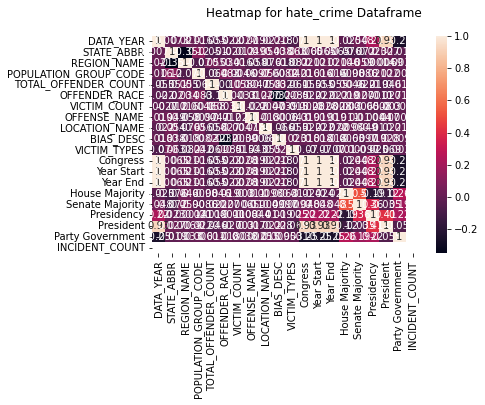

In [107]:
# ##Correlation matrix
# import seaborn as sns
# corr_matrix = hate_crime_enc.corr()
# corr_matrix

# #plot the correlation heatmap
# fig,ax = plt.subplots()
# fig.suptitle('Heatmap for hate_crime Dataframe')
# sns.heatmap(corr_matrix, annot=True)
# plt.show

In [48]:
#group by region
#total number incidents / region

region_grouped = hate_crime_combined.groupby(['REGION_NAME', 'DATA_YEAR'])['INCIDENT_COUNT'].sum().reset_index()
region_grouped


,REGION_NAME,DATA_YEAR,INCIDENT_COUNT
0,Midwest,1991,733
1,Midwest,1992,779
2,Midwest,1993,1565
3,Midwest,1994,1127
4,Midwest,1995,1356
...,...,...,...
121,West,2016,1954
122,West,2017,2226
123,West,2018,2195
124,West,2019,2391


In [52]:
region_grouped['REGION_NAME'].value_counts()

Midwest             30
Northeast           30
South               30
West                30
Other                4
U.S. Territories     2
Name: REGION_NAME, dtype: int64

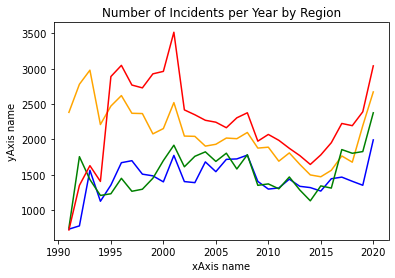

In [64]:
midwest = region_grouped[region_grouped['REGION_NAME']=='Midwest']
northeast = region_grouped[region_grouped['REGION_NAME']=='Northeast']
south = region_grouped[region_grouped['REGION_NAME']=='South']
west = region_grouped[region_grouped['REGION_NAME']=='West']
#combined = 

plt.plot(midwest['DATA_YEAR'],midwest['INCIDENT_COUNT'], color='blue')
plt.plot(northeast['DATA_YEAR'],northeast['INCIDENT_COUNT'], color='orange')
plt.plot(south['DATA_YEAR'],south['INCIDENT_COUNT'], color='green')
plt.plot(west['DATA_YEAR'],west['INCIDENT_COUNT'], color='red')

plt.title('Number of Incidents per Year by Region')
plt.xlabel('xAxis name')
plt.ylabel('yAxis name')
plt.show()

In [80]:
hc_by_year['INCIDENT_COUNT'].max()

10299

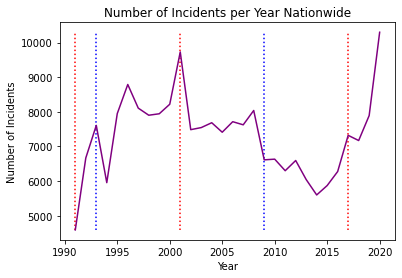

In [88]:
import matplotlib.collections as collections

plt.plot(hc_by_year['DATA_YEAR'],hc_by_year['INCIDENT_COUNT'], color='purple')


plt.vlines(1991, 4589, 10299, linestyles ="dotted", colors ="r")
plt.vlines(1993, 4589, 10299, linestyles ="dotted", colors ="b")
plt.vlines(2001, 4589, 10299, linestyles ="dotted", colors ="r")
plt.vlines(2009, 4589, 10299, linestyles ="dotted", colors ="b")
plt.vlines(2017, 4589, 10299, linestyles ="dotted", colors ="r")

plt.title('Number of Incidents per Year Nationwide')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.show()

In [93]:
race_grouped = hate_crime_combined.groupby(['OFFENDER_RACE', 'DATA_YEAR'])['INCIDENT_COUNT'].sum().reset_index()
hate_crime_combined['OFFENDER_RACE'].value_counts()

Unknown                                      97354
White                                        86403
Black or African American                    28507
Multiple                                      4423
Asian                                         1596
American Indian or Alaska Native              1211
Native Hawaiian or Other Pacific Islander       83
Name: OFFENDER_RACE, dtype: int64

In [98]:
race_grouped['INCIDENT_COUNT'].min()

2

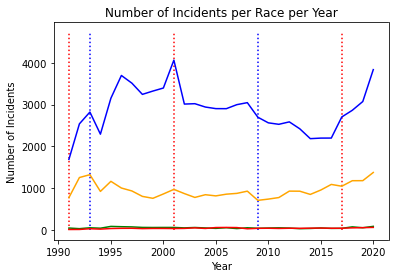

In [99]:
white = race_grouped[race_grouped['OFFENDER_RACE']=='White']
black = race_grouped[race_grouped['OFFENDER_RACE']=='Black or African American']
asian = race_grouped[race_grouped['OFFENDER_RACE']=='Asian']
native = race_grouped[race_grouped['OFFENDER_RACE']=='American Indian or Alaska Native']
#combined = 

plt.plot(white['DATA_YEAR'],white['INCIDENT_COUNT'], color='blue')
plt.plot(black['DATA_YEAR'],black['INCIDENT_COUNT'], color='orange')
plt.plot(asian['DATA_YEAR'],asian['INCIDENT_COUNT'], color='green')
plt.plot(native['DATA_YEAR'],native['INCIDENT_COUNT'], color='red')

plt.vlines(1991, 2, 4730, linestyles ="dotted", colors ="r")
plt.vlines(1993, 2, 4730, linestyles ="dotted", colors ="b")
plt.vlines(2001, 2, 4730, linestyles ="dotted", colors ="r")
plt.vlines(2009, 2, 4730, linestyles ="dotted", colors ="b")
plt.vlines(2017, 2, 4730, linestyles ="dotted", colors ="r")

plt.title('Number of Incidents per Race per Year')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.show()

<AxesSubplot:>

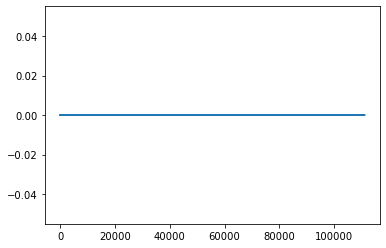

In [108]:
hate_crime_combined['Return'] = hate_crime_combined['INCIDENT_COUNT'].pct_change()

hate_crime_combined['Return'].plot()

### Supervised Learning

In [25]:
## Categorical encoding
# for col in hate_crime:
#     if (hate_crime[col].dtypes) == object:
#         hate_crime[col] = hate_crime[col].astype('category')
#         hate_crime[col] = hate_crime[col].cat.codes   

In [26]:
#hate_crime_combined.dtypes

In [105]:
hate_crime_enc = hate_crime_combined

In [106]:
## Categorical encoding
for col in hate_crime_enc:
    if (hate_crime_enc[col].dtypes) == object:
        hate_crime_enc[col] = hate_crime_enc[col].astype('category')
        hate_crime_enc[col] = hate_crime_enc[col].cat.codes  

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report

# # Grid Search to find optimal k value
# params = {'n_neighbors': np.arange(5, 30, 2)}

# k_neighbors = KNeighborsClassifier()

# cv = GridSearchCV(k_neighbors, params, cv=5)
# cv.fit(X_train_sc, y_train)
# cv.best_params_

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#predict presidency based on incident, 55% accuracy
X1 = hate_crime_enc[['STATE_ABBR', 'REGION_NAME', 'POPULATION_GROUP_CODE', 'TOTAL_OFFENDER_COUNT', 
                     'OFFENDER_RACE', 'VICTIM_COUNT', 'OFFENSE_NAME', 'LOCATION_NAME', 'BIAS_DESC']]
y1 = hate_crime_enc['Presidency']

#predict region based on incident, 48% accuracy
X2 = hate_crime_enc[['POPULATION_GROUP_CODE', 'TOTAL_OFFENDER_COUNT', 
                    'OFFENDER_RACE', 'VICTIM_COUNT', 'OFFENSE_NAME', 'LOCATION_NAME', 'BIAS_DESC']]
y2 = hate_crime_enc['REGION_NAME']

X = 
y = 

## train test split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42, stratify=y)


## scale X data
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.fit_transform(X_test)

In [30]:
# from sklearn.linear_model import Lasso

# lasso = Lasso(alpha=0.6)
# lasso_coef = lasso.fit(X,y).coef_
# lasso_coef

# X_labels = X.columns

# plt.plot(range(len(X_labels)), lasso_coef)
# plt.xticks(range(len(X_labels)), X_labels, rotation=90)
# plt.ylabel('Coefficients')
# plt.suptitle('Lasso Regression')
# plt.show()

In [39]:
knn = KNeighborsClassifier()
knn.fit(X_train_sc, y_train)
y_pred = knn.predict(X_test_sc)

In [40]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.32      0.38      0.34     13023
           1       0.58      0.63      0.61     18829
           2       0.44      0.20      0.28       128
           3       0.42      0.38      0.40     13794
           4       0.00      0.00      0.00         1
           5       0.53      0.46      0.49     20099

    accuracy                           0.48     65874
   macro avg       0.38      0.34      0.35     65874
weighted avg       0.48      0.48      0.48     65874



C:\Users\aspen\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aspen\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aspen\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [34]:
y.value_counts()

0    112403
1    107174
Name: Presidency, dtype: int64

In [35]:
X_test_sc

array([[ 1.57966859,  1.30608225, -0.48132032, ..., -2.21066139,
        -2.46781628, -0.03004317],
       [-0.13031193, -0.7376579 , -0.25670008, ...,  1.17684405,
         0.22146138, -0.93991093],
       [-1.37991308,  1.30608225, -0.93056081, ...,  1.17684405,
        -0.56291127, -0.43442884],
       ...,
       [ 0.52737289, -0.7376579 , -0.03207984, ...,  0.47111375,
         0.89378079, -0.43442884],
       [ 0.72467833, -0.7376579 , -1.15518105, ...,  1.17684405,
         0.22146138, -0.43442884],
       [ 0.72467833, -0.7376579 , -0.48132032, ...,  0.47111375,
         0.22146138, -0.93991093]])

In [36]:
## next work on aggregating data into totals by year, most common bias, etc. try to run KNN again
## predict trends for next years